# Data Load

In [2]:
import torch
import torch.nn as nn

## 단순한 방법

In [3]:
import pandas as pd

data = pd.read_csv('./Data/Linear_Regression_model_data.csv')
data

,Unnamed: 0,x,y
0,0,1.0,1.619379
1,1,2.0,1.857290
2,2,3.0,2.628194
3,3,4.0,2.725426
4,4,5.0,3.498926
5,5,6.0,3.867042
6,6,7.0,4.934539
7,7,8.0,4.864829
8,8,9.0,5.241539
9,9,10.0,5.823689


In [9]:
x = torch.from_numpy(data['x'].values).unsqueeze(dim=1).float()
x

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]])

In [11]:
y = torch.from_numpy(data['y'].values).unsqueeze(dim=1).float()
y

tensor([[1.6194],
        [1.8573],
        [2.6282],
        [2.7254],
        [3.4989],
        [3.8670],
        [4.9345],
        [4.8648],
        [5.2415],
        [5.8237]])

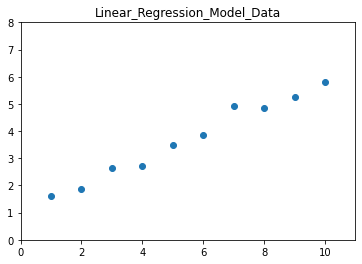

In [13]:
import matplotlib.pyplot as plt
plt.xlim(0, 11); plt.ylim(0, 8)
plt.title('Linear_Regression_Model_Data')
plt.scatter(x, y)

# Dataloader 사용

### MNIST datasets Download

In [14]:
import torchvision.transforms as transforms

# Normalize data with mean=0.5, std=1.0
mnist_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])

### torchvision.transforms
이미지 변환 함수를 포함
* transforms.CenterCrop(size): 이미지 중앙 부분 크롭하여 [size, size] 로 변환
* transforms.Resize(size, interpolation=2): 이미지를 지정한 크기로 변환
* transforms.RandomCrop(size, padding=None, pad_if_needed=False, fill=0, padding_mode='constant'): 이미지의 랜덤부분을 [size, size] 만큼 crop. input이 size 보다 작으면 설정한 padding을 추가
* transforms.RandomResizedCrop(size, scale=(0.08, 1.0), ratio=(0.74, 3/4), interpolation=2): 이미지를 랜덤한 크기 및 비율로 crop
* transforms.RandomRotation(degrees, resample=False, expand=False, center=None): 이미지를 랜덤한 각도로 회전   

더 많은 정보는 [torchvision.transforms](https://pytorch.org/docs/stable/torchvision/transforms.html?highlight=torchvision%20transforms) 에서 확인 가능

해당 모든 transforms 변환 함수를 조합하여 dataloader 에 넘겨줄 수 있음

In [45]:
transforms.Compose([transforms.CenterCrop(14), transforms.ToTensor(), transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])

Compose(
    CenterCrop(size=(14, 14))
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)

In [16]:
from torchvision.datasets import MNIST
download_root = './Data'

train_dataset = MNIST(download_root, transform=mnist_transform, train=True, download=True)
valid_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)
test_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)

In [17]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./Data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(1.0,))
           )

### MNIST datasets 확인

In [27]:
from torch.utils.data import DataLoader
batch_size = 64  # batch size 를 64 로 설정

train_dataloader = DataLoader(train_dataset, batch_size=batch_size)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

In [29]:
first_data = train_dataloader.__iter__().__next__()
print(first_data[0].size(), first_data[1].size())

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [30]:
first_data[1]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0])

### Custom Dataset 만들기
torch.utils.data.Dataset 를 상속하여 만들 수 있음
* `__len__(self)`: dataset 전체 개수를 알려준다
* `__getitem__(self, idx)`: parameter로 idx를 넘겨주면 dix번째 데이터를 반환한다

In [34]:
from torch.utils.data import Dataset
simple_datas, simple_labels = first_data[0], first_data[1]
class customDataloader(Dataset):
    def __init__(self, data, label):
        self.x = data
        self.y = label
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        x = self.x[idx, :, :, :]
        y = self.y[idx]
        return x, y

In [38]:
custom_dataset = customDataloader(simple_datas, simple_labels)
custom_dataloader = DataLoader(custom_dataset, batch_size=2)

In [41]:
a, b = custom_dataloader.__iter__().__next__()

In [43]:
a.size(), b.size()

(torch.Size([2, 1, 28, 28]), torch.Size([2]))

In [44]:
b

tensor([5, 0])